In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import os
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
#load dataset
mnist =tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Shape X_train: ", X_train.shape)
print("Shape y_train: ", y_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_test: ", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape X_train:  (60000, 28, 28)
Shape y_train:  (60000,)
Shape X_test:  (10000, 28, 28)
Shape y_test:  (10000,)


In [3]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

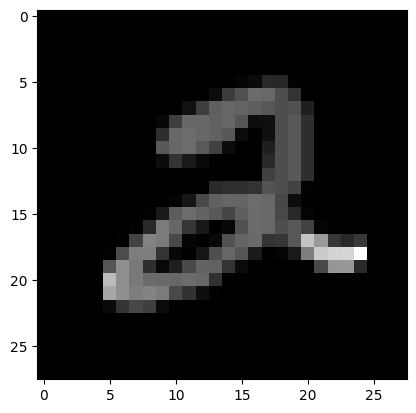

In [6]:
plt.imshow(X_train[5], cmap='gray')

In [13]:
#build model CNN

model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')        
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9248 - loss: 0.2506
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9725 - loss: 0.0923
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9799 - loss: 0.0673
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9836 - loss: 0.0533
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9865 - loss: 0.0436
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9882 - loss: 0.0364
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9903 - loss: 0.0321
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9913 - loss: 0.0281
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9917 - loss: 0.0262
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9926 - loss: 0.0228


In [14]:
model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9929 - loss: 0.0293


[0.029292937368154526, 0.992900013923645]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
So nay co kha nang la:  1


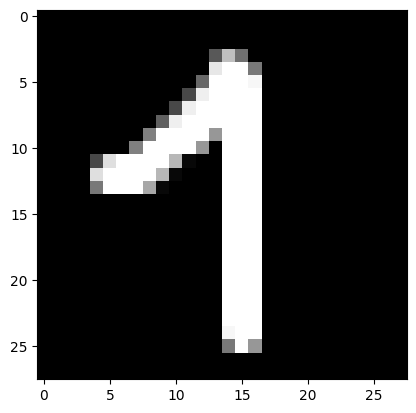

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
So nay co kha nang la:  2


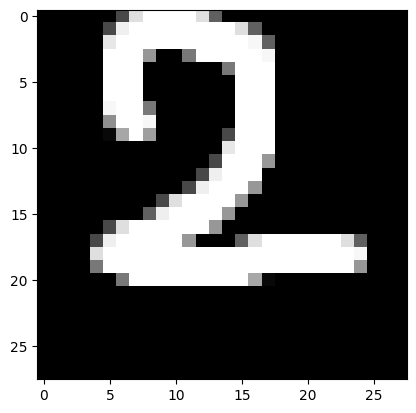

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
So nay co kha nang la:  4


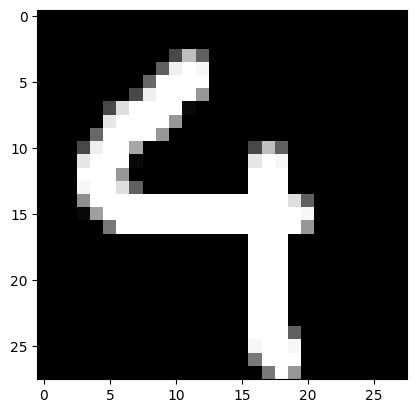

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
So nay co kha nang la:  7


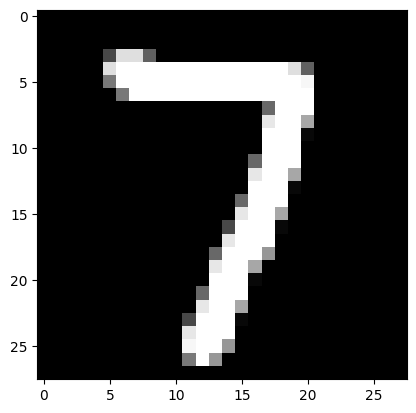

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
So nay co kha nang la:  4


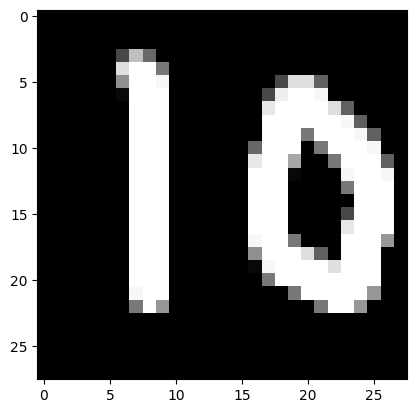

In [28]:
# Test on my data
index = 1
while os.path.exists(f'test/{index}.png'):
    img = cv2.imread(f'test/{index}.png', cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array(img))
    img = img.reshape(1, 28, 28, 1)
    y_pred = model.predict(img)
    print('So nay co kha nang la: ', np.argmax(y_pred))
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()
    index += 1